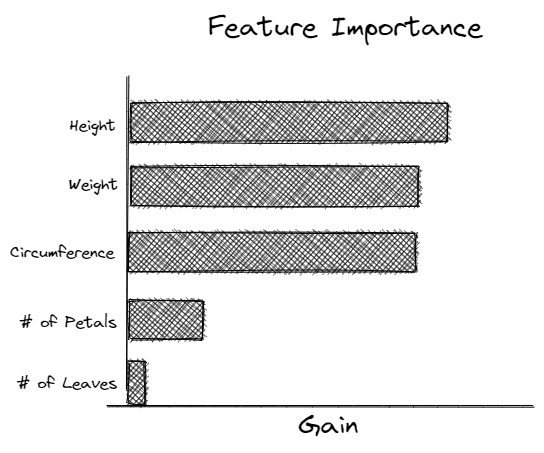

# Outline

- Materials

- Why Feature Importance?

- Global vs Local Importance

- Model-specific vs Model-agnostic

- Model-specific Importance
    - Linear regression
    - Logistic regression
    - Decision trees and Gini importance

- Model-agnostic Importance
    - Permutation importance
    - Other methods

- Feature Selection using Feature Importance
    
- Sanity Check
    
- Pitfalls to Avoid

# Materials

## Notebook

### https://github.com/r-clements/feature-importance

## References

Molnar, Christoph. “Interpretable machine learning. A Guide for Making Black Box Models Explainable”, 2019. https://christophm.github.io/interpretable-ml-book/.

https://explained.ai/rf-importance/index.html#2

## Data

We will continue to use the Cervical Cancer dataset from previous lessons. Original unprocessed version can be downloaded  at https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29.

## From last time

Recall that last time we learned about Feature Engineering, and getting your features ready for modeling by dealing with missing values, outliers, zero-variance features, highly correlated features, and categorical variables. Today we will talk about another useful tool for developing good models and selecting features: feature importance!

## Cervical Cancer Data

858 Patients

(int) Age  
(int) Number of sexual partners  
(int) First sexual intercourse (age)  
(int) Num of pregnancies  
(bool) Smokes  
(bool) Smokes (years)  
(bool) Hormonal Contraceptives  
(int) Hormonal Contraceptives (years)  
(bool) IUD  
(int) IUD (years)  
(bool) STDs  
(int) STDs (number)  
(int) STDs: Number of diagnosis  
(int) STDs: Time since first diagnosis  
(int) STDs: Time since last diagnosis  
(bool) Biopsy: target variable

---

### Question: What features do you think will be important for predicting cervical cancer? Why?

---

# Why Feature Importance?

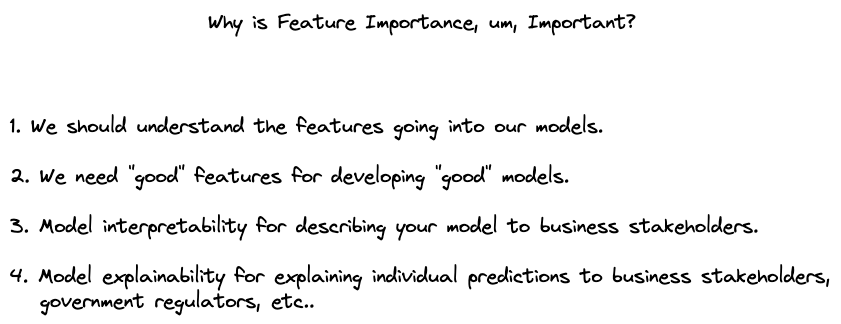

Today we will focus only on introducing concepts for 1-3. While 4 (Explainability) is important, it is a **big** topic and needs more time. But, really quickly, I will explain one of the *key* differences between what we will focus on now, versus in the future when we go over Model Explainability.

---

# Global vs Local Importance

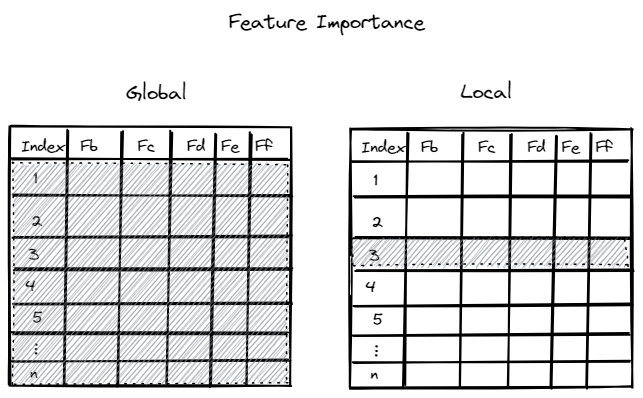

Today our focus is on "Global" feature importance, which will tell us, on average, which features are the most important for our models, across the entire training set. "Local" feature importance tells us how each of our features influences a specific prediction for a specific observation in our data. In the future we will show how Global and Local importance, when combined, can be used for *explaining* our models' predictions. 

---

# Model-Specific vs Model-Agnostic

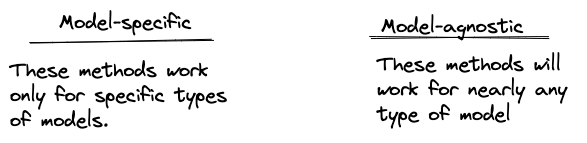

---

# Model-Specific Importance

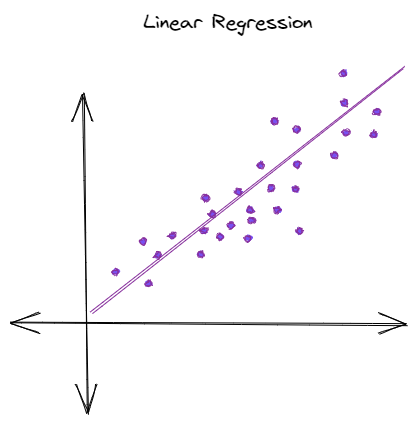

## Using Coefficients

<center>$\hat{y} = \hat{\beta}_{0} + \hat{\beta}_{1} x_{1} + \cdots + \hat{\beta}_{p}x_{p} $ </center>

With linear regression you end up with a linear model with weights/coefficients for each feature, and a bias term. Those coefficients alone do not indicate importance, but you can use the p-value (or the absolute value of the test statistic) as a measure of how significant the feature is:


<center> $t_{\hat{\beta}_{j}} = \frac{\hat{\beta}_{j}}{SE(\hat{\beta}_{j})}$ </center>

Aside from measuring significance, you can also *interpret* the feature's contribution to the model by correctly interpreting the coefficient. **Recall that the value of the coefficient tells you the average increase/decrease in your target variable for every one unit increase/decrease in the feature.**

---

### Question: When might the size of the coefficients in a linear regression model indicate a feature's importance?

---


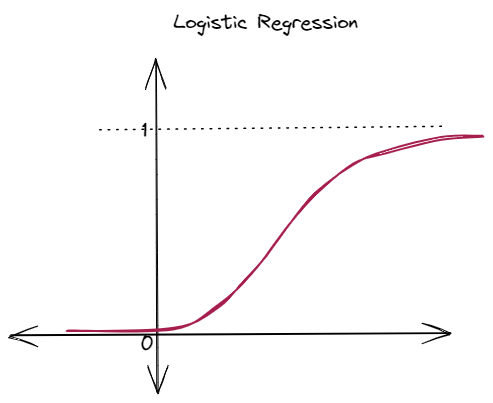

## Using Coefficients

Often when training a model we might rescale or normalize our features. This is especially important for LASSO or Ridge regression, which are regularized versions of regression. When we do this, we put all of the features on the same scale. This has the added benefit of being able to assess feature importance based on the size (absolute value) of the coefficients, but unfortunately some interpretability is lost.

---

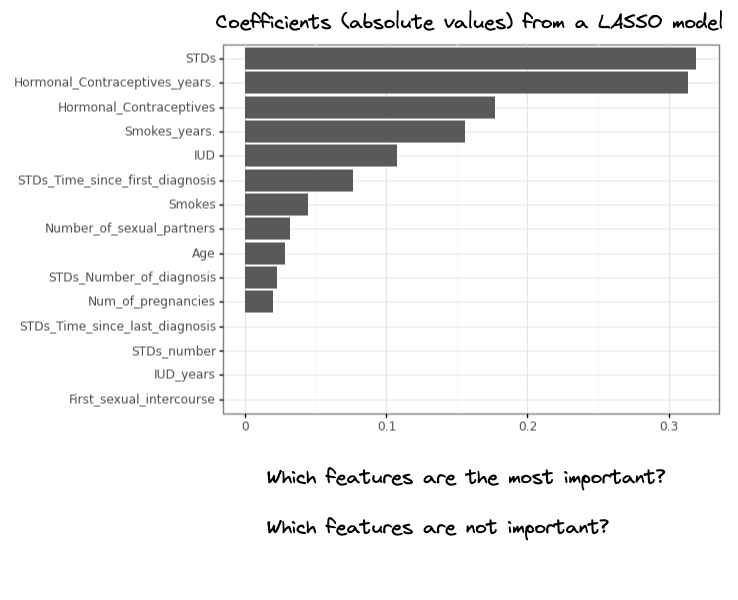

---



### Activity

Let's write code to train a quick Logistic Regression model, with either an L1 or L2 penalty, on the Cervical Cancer dataset following these steps:

1. Load the libraries you'll need and load the data  
2. *Look* at your data
3. Train the model (Target = Biopsy; Features = select whichever you want)
4. Look at the coefficients and determine the most *important* features

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the data and look at it (info, describe, head)
cerv = pd.read_csv('cervical.csv')
cerv.describe()

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes_years.,Hormonal_Contraceptives,Hormonal_Contraceptives_years.,IUD,IUD_years,STDs,STDs_number,STDs_Number_of_diagnosis,STDs_Time_since_first_diagnosis,STDs_Time_since_last_diagnosis
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.979021,2.192308,0.143357,1.201241,0.686480,1.972394,0.096737,0.444604,0.092075,0.155012,0.087413,1.425408,1.398601
std,8.497948,1.644759,2.797653,1.434395,0.350641,4.060623,0.464194,3.597888,0.295771,1.814218,0.289300,0.529617,0.302545,2.201550,2.113931
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,3.000000,22.000000,22.000000


In [2]:
cerv.head()

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes_years.,Hormonal_Contraceptives,Hormonal_Contraceptives_years.,IUD,IUD_years,STDs,STDs_number,STDs_Number_of_diagnosis,STDs_Time_since_first_diagnosis,STDs_Time_since_last_diagnosis,Biopsy
0,18,4,15,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
1,15,1,14,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
2,34,1,15,1,0,0.0,0,0.0,0,0.0,0,0,0,1,1,Healthy
3,52,5,16,4,1,37.0,1,3.0,0,0.0,0,0,0,1,1,Healthy
4,46,3,21,4,0,0.0,1,15.0,0,0.0,0,0,0,1,1,Healthy


In [3]:
# create the training and testing data sets
x = cerv.drop('Biopsy', axis = 1)
y = cerv['Biopsy']

# change the target from string to 0,1 column
y.replace(['Healthy', 'Cancer'],[0,1], inplace = True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [4]:
# fit the Logistic regression model (you can choose l1 or l2 penalty)
lg_model = LogisticRegression(penalty='l1',solver='liblinear', random_state=121)
lg_model.fit(x_train, y_train)

# extract the coefficients
importance = abs(lg_model.coef_[0])

In [5]:
# import plotting library
from plotnine import ggplot, aes, geom_bar, geom_col, coord_flip, theme_bw, xlab, ylab

# sort feature importances and create dataframe for plotting
feat_sort = importance.argsort()

feat_imp = pd.DataFrame({"features":x_train.columns[feat_sort], "importance":importance[feat_sort]})
feat_imp['features'] = pd.Categorical(feat_imp['features'], categories=feat_imp['features'], ordered=True)
feat_imp

,features,importance
0,Smokes,0.000000
1,STDs,0.000000
2,STDs_Number_of_diagnosis,0.000000
3,Number_of_sexual_partners,0.002692
4,Age,0.022081
5,STDs_Time_since_last_diagnosis,0.031653
6,First_sexual_intercourse,0.040641
7,Hormonal_Contraceptives_years.,0.041566
8,Smokes_years.,0.091325
9,IUD,0.093445


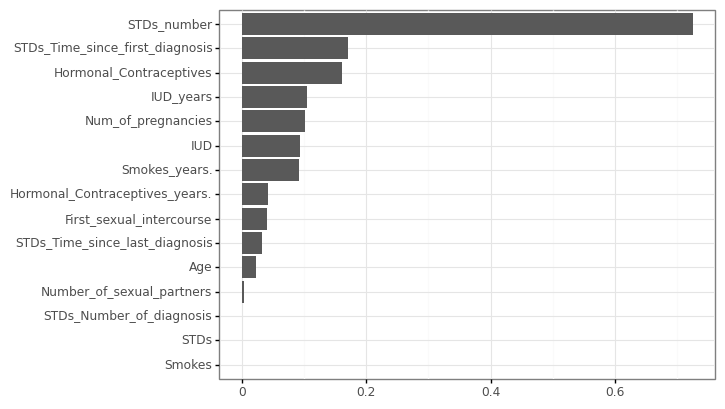

<ggplot: (140198943741)>

In [6]:
# plot feature importance barchart
ggplot(feat_imp) + geom_col(aes(x = 'features', y = 'importance')) + coord_flip() + ylab('') + xlab('') + theme_bw()

### Whoops, we forgot an important step.

In [7]:
# we need to rescale the features before fitting the model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_sc = scaler.fit_transform(x_train)

lg_model.fit(x_train_sc, y_train)

# extract the coefficients
importance = abs(lg_model.coef_[0])

In [8]:
feat_sort = importance.argsort()

feat_imp = pd.DataFrame({"features":x_train.columns[feat_sort], "importance":importance[feat_sort]})
feat_imp['features'] = pd.Categorical(feat_imp['features'], categories=feat_imp['features'], ordered=True)

feat_imp

,features,importance
0,STDs_Number_of_diagnosis,0.000000
1,STDs_Time_since_last_diagnosis,0.000000
2,Smokes,0.015779
3,Number_of_sexual_partners,0.048221
4,First_sexual_intercourse,0.048294
5,Hormonal_Contraceptives,0.062286
6,Num_of_pregnancies,0.075029
7,Hormonal_Contraceptives_years.,0.124668
8,Age,0.143238
9,IUD,0.150987


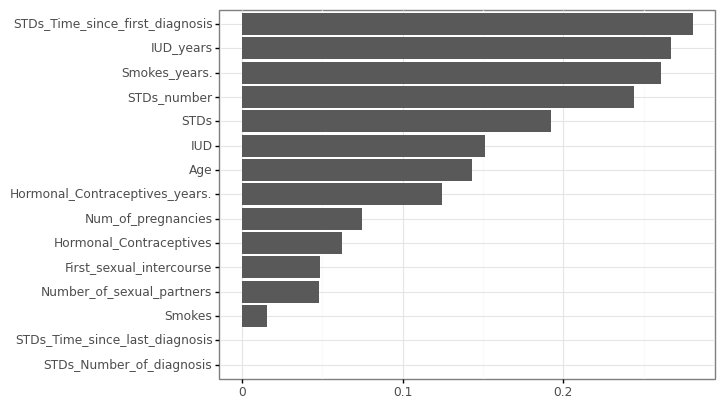

<ggplot: (140199471203)>

In [9]:
ggplot(feat_imp) + geom_col(aes(x = 'features', y = 'importance')) + coord_flip() + ylab('') + xlab('') + theme_bw()

---

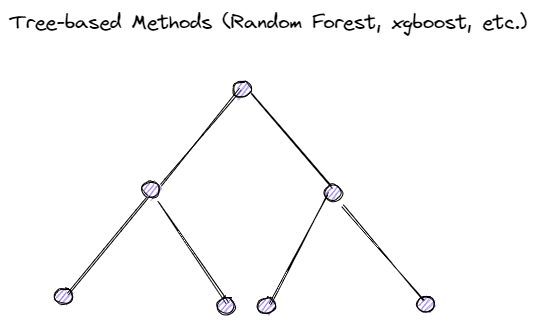

## Gini Importance

Usually the default way of assessing feature importance for decision trees and random forests is the gini importance, or the mean decrease impurity importance. This method is actually not a great way to assess importance, but is included here for completeness.

## How does it work?

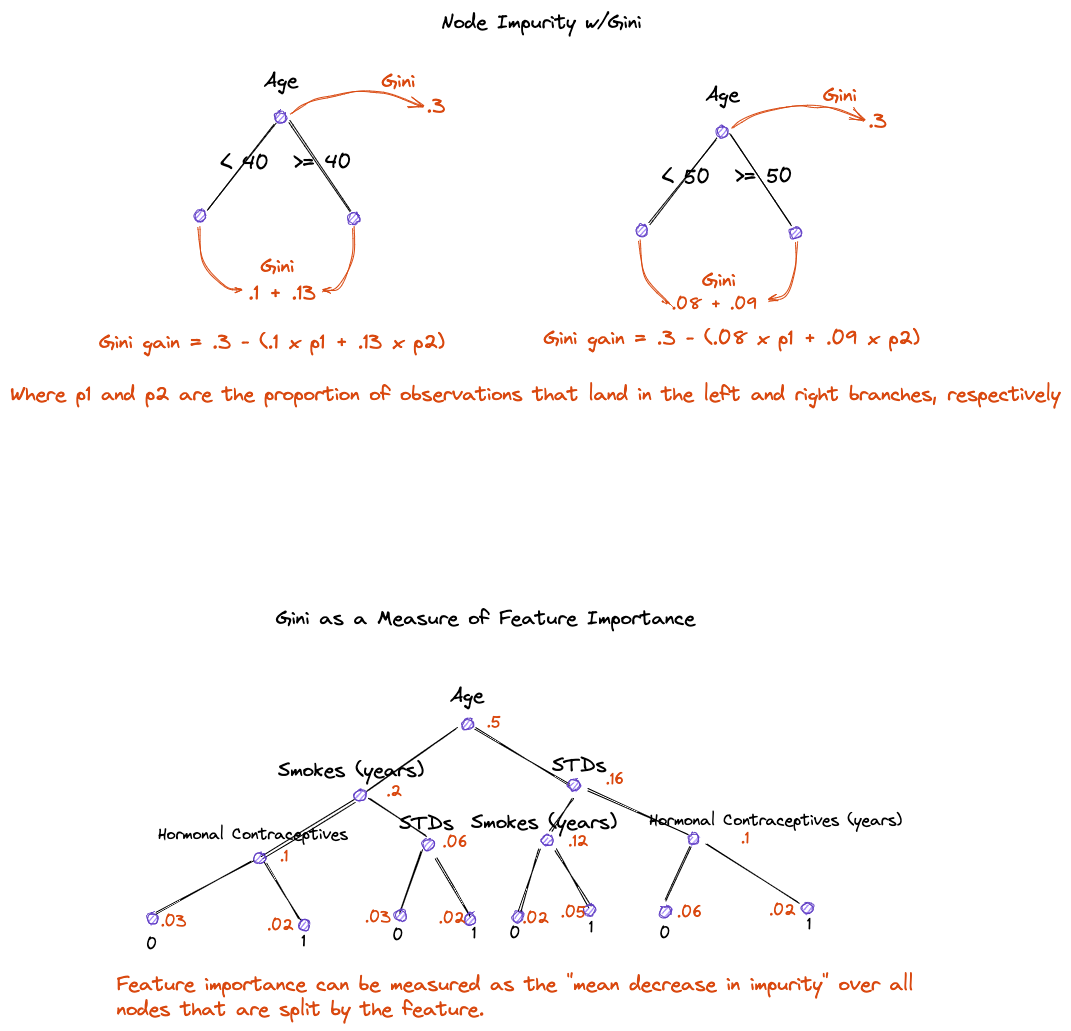

## Advantages

- Fairly intuitive idea

## Disadvantages

- Biased towards continuous features
- Confusing in the details
- Issues with correlated features

In [10]:
# import decision tree classifier and fit the model
from sklearn.tree import DecisionTreeClassifier

tr_model = DecisionTreeClassifier()

tr_model.fit(x_train, y_train)

# extract feature importances and sort
importance = tr_model.feature_importances_
feat_sort = importance.argsort()

feat_imp = pd.DataFrame({"features":x_train.columns[feat_sort], "importance":importance[feat_sort]})
feat_imp['features'] = pd.Categorical(feat_imp['features'], categories=feat_imp['features'], ordered=True)

feat_imp

,features,importance
0,Smokes,0.000000
1,IUD,0.000000
2,STDs,0.000000
3,STDs_Time_since_first_diagnosis,0.000000
4,STDs_Time_since_last_diagnosis,0.000000
5,STDs_Number_of_diagnosis,0.007977
6,STDs_number,0.013489
7,Hormonal_Contraceptives,0.016937
8,IUD_years,0.026973
9,Smokes_years.,0.028711


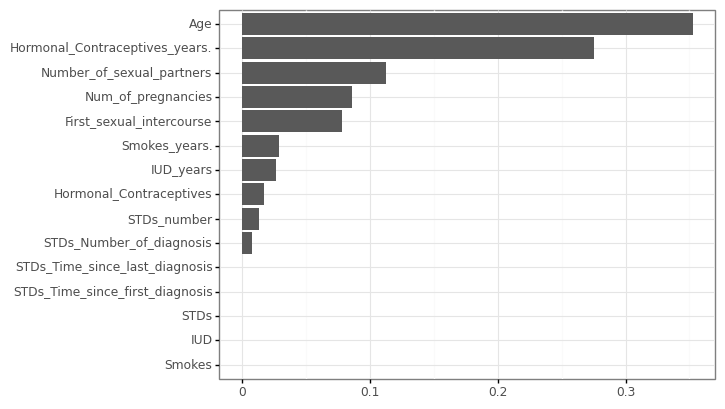

<ggplot: (-9223371896655233585)>

In [11]:
# plot feature importance barchart
ggplot(feat_imp) + geom_col(aes(x = 'features', y = 'importance')) + coord_flip() + ylab('') + xlab('') + theme_bw()

---

# Model-agnostic Importance

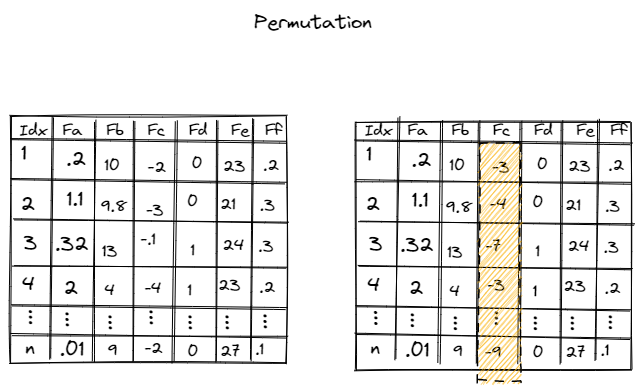

## How does it work?

Permutation importance is a method that can be used with linear and tree-based modeling methods and works like this:

- Estimate the error of the model on your original training or testing data (e.g. log loss, accuracy, mse, etc.). Call this $s$
- For each feature j:
    - Permute the data for feature j
    - Use the new data with permuted feature to get predictions
    - Calculate the error of the model
    - repeat K times
- Calculate feature importance for each feature as $I_{j} = s - \frac{1}{K}\sum_{k=1}^{K}s_{k,j}$

## Advantages

- Intuitive: it breaks the potential relationship between the feature and the target AND between the feature and other features it might interact with  
- Doesn't bias towards high-cardinality data like the Gini importance does  
- No model retraining necessary. 

## Disadvantages

- Correlated features are still an issue  in two ways:
    - Splitting the importance
    - Creating unrealistic observations when you do the permutation

In [12]:
# import permutation importance function
from sklearn.inspection import permutation_importance

p_importance = permutation_importance(tr_model, x_train, y_train, n_repeats=25, random_state=12)

p_importances = p_importance.importances_mean
perm_sort = p_importances.argsort()

perm_imp = pd.DataFrame({"features":x_train.columns[perm_sort], "importance":p_importances[perm_sort]})
perm_imp['features'] = pd.Categorical(perm_imp['features'], categories=perm_imp['features'], ordered=True)

feat_imp

,features,importance
0,Smokes,0.000000
1,IUD,0.000000
2,STDs,0.000000
3,STDs_Time_since_first_diagnosis,0.000000
4,STDs_Time_since_last_diagnosis,0.000000
5,STDs_Number_of_diagnosis,0.007977
6,STDs_number,0.013489
7,Hormonal_Contraceptives,0.016937
8,IUD_years,0.026973
9,Smokes_years.,0.028711


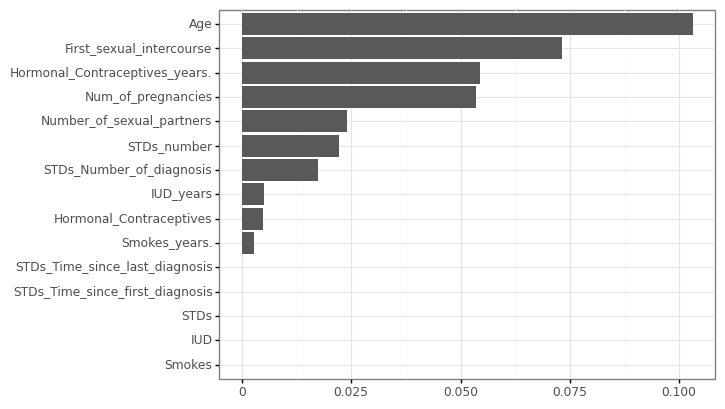

<ggplot: (140201020964)>

In [13]:
# plot feature importance barchart
ggplot(perm_imp) + geom_col(aes(x = 'features', y = 'importance')) + coord_flip() + ylab('') + xlab('') + theme_bw()

---

## Other methods

- Partial dependence plots
- Accumulated local effects
- Surrogate models

---

# Feature Selection using Feature Importance

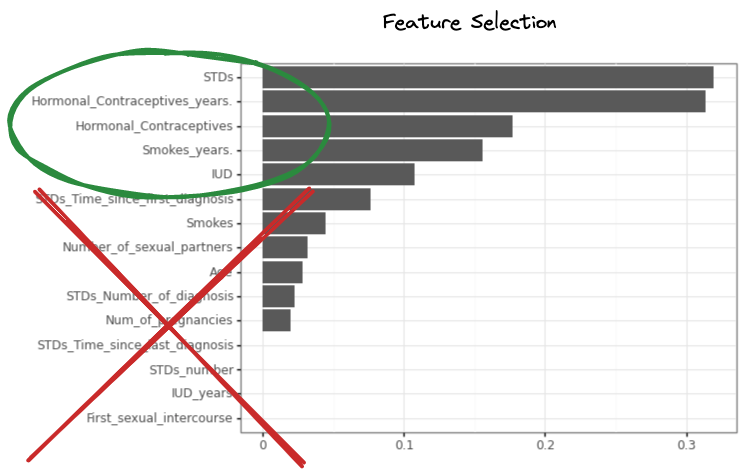

---

### Question: Should you throw away all features with low importance and go with a retrained model? What other things might you consider first?


- Column-drop method
- Remove correlated features 
- Try multiple models and feature importances
---

# Sanity Check

--- 

### Question: How do we know these methods actually work? Is there something we can do ourselves to test them out?

---

# Pitfalls to avoid

## Evaluate your model first

Don't fall into the trap of taking feature importance values seriously when your model is not even a good fit. It can be tempting to look at a very poorly fitting model and still look at feature importance as if they are telling you something about the data, and about which features are good predictors. 

## Beware correlated features 

These can mess with your results in multiple ways. The general idea is that correlated features can *split* importance, making both features look less important than they otherwise are. In cases of GLMs, even the weights/coefficients won't be meaningful for correlated features. 

## Size of coefficients isn't meaningful without rescaling/normalizing

Unless you rescale all of your features so that they are each on the same scale, the actual size of your coefficients for GLMs does not indicate importance.

## Don't use impurity-based importance

Impurity-based feature importance will give unreliable results when you have high-cardinality, or continuous, features because trees will be biased towards selecting these features. https://explained.ai/rf-importance/index.html#2

## There is no silver bullet

There are many ways to assess feature importance, and each has their advantages and disadvantages, so don't become too comfortable with relying on the same default method for all of your models.